In [1]:
import numpy as np
import numpy_financial as npf
import pandas as pd
from scipy.optimize import newton
import matplotlib.pyplot as plt

<h3>
<font color=blue> Internal Rate of Return </font>
</h3>

The <font color=blue> Internal Rate of Return (IRR) </font> is the discount rate that makes the Net Present Value (NPV) of an investment equal to zero. In other words, it is the rate at which the cash inflows from an investment equal the cash outflows, taking into account the time value of money.

In [11]:
cashflows = [-2000, 1000, 800, 1100]
rate = 0.15

In [12]:
npv = sum([cf/(1+rate)**p for p, cf in enumerate(cashflows)])
print(format(abs(npv), '.15f'))

197.748006903920782


In [16]:
cashflows = [-2000, 1000, 800, 1100]
rate = 0.195
npv = sum([cf/(1+rate)**p for p, cf in enumerate(cashflows)])
print(format(abs(npv), '.15f'))

41.632388823871452


In [17]:
def getZero(rate) :
    npv = sum([cf/(1+rate)**p for p, cf in enumerate(cashflows)])
    return npv

In [18]:
final_rate= newton(getZero,.01)
final_rate

0.20801483407871815

In [19]:
print(format(abs(sum([cf/(1+final_rate)**p for p, cf in enumerate(cashflows)])), '.2f'))

0.00


In [20]:
discount_list = []
npv_list = []
for rate in np.arange(0.100, .300, .001) :
    s = sum([cf/(1+rate)**p for p, cf in enumerate(cashflows)])
    discount_list.append(rate)
    npv_list.append(s)
    if s < 0.01 :
        break

In [21]:
df=pd.DataFrame(zip(discount_list, npv_list), columns = ['discount', 'npv'])
pd.set_option('display.max_rows', 1000)
df

,discount,npv
0,0.100,396.694215
1,0.101,392.418200
2,0.102,388.155110
3,0.103,383.904891
4,0.104,379.667490
5,0.105,375.442856
6,0.106,371.230936
7,0.107,367.031679
8,0.108,362.845032
9,0.109,358.670945


In [22]:
sum([cf/(1+.208)**p for p, cf in enumerate(cashflows)])

0.046616986416665895

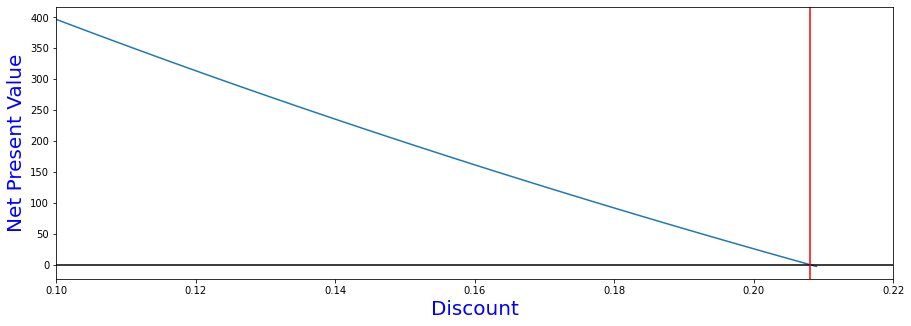

In [23]:
plt.figure(figsize=(15,5))
plt.xlim(.1,.22,.2)
plt.plot(discount_list, npv_list)
plt.axhline(0, color='k')
plt.ylabel('Net Present Value', c='b',size=20 )
plt.xlabel('Discount', c='b', size=20)
plt.axvline(discount_list[-2], color='r')
plt.show()